# Solutions to Modern Data Science Problems (probelms till 18.12)
by *Mateusz Kmieć* 

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

### Problem. 32

We consider a linear regression model. Let’s assume that the error model is additive $y
= f(x) + \epsilon$ , and errors have Gaussian distribution with 0 mean ($\text{E}[\epsilon]=0$) and variance 
($\text{Var}[\epsilon] =\sigma^{2}$). Show that the MLE approach leads to the same minimization problem as OLS
solution for the quadratic loss function $L(Y,f(X))= (Y-f(X))^{2}$.

Assumed model:
    
(1) $$y=f(x)+\epsilon=\theta_{0}+\theta_{1}x+\epsilon$$,

where $\epsilon\in N(0,\sigma^{2})$.

The central problem of this task is the problem of finding $(\theta_{0},\theta_{1})$ that maximises the joint likelhood that the chosen model fits to data:  

(2) $$L(\theta_{0}, \theta_{1})=\prod_{i=1}^{N} \text{pdf}(y^{i}|x^{i},\theta_{0},\theta_{1}).$$

Let us notice that (2) has maximum in the same place as $\ln\left(L(\theta_{0},\theta_{1})\right) \equiv \ln(L)$. 

Consequently, we can find the maximum of (2) by calculating maximum of (3):

(3) $$\ln(L)=\ln\left[ \prod_{i=1}^{N}\text{pdf}(y^{i}|x^{i},\theta_{0},\theta_{1})\right]=\sum_{i=1}^{N}\ln\left(\text{pdf}(y^{i}|x^{i},\theta_{0},\theta_{1})\right).$$

The assumption of gaussian distribution of errors yields:
    
(4) $$\text{pdf}(y^{i}|x^{i},\theta_{0},\theta_{1})=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{\left(y^{i}-(\theta_{0}+\theta_{1}x^{i})\right)^{2}}{2\sigma^{2}}}.$$

Now, if we substitute (4) into (3) we will get:
    
(5) $$\ln(L)=\sum_{i=1}^{N} \left[\ln\left(\frac{1}{\sqrt{2\pi\sigma^{2}}}\right)-\frac{\left(y^{i}-(\theta_{0}+\theta_{1}x^{i})\right)^{2}}{2\sigma^{2}}\right].$$

Since the first term doesn't depend on $(\theta_{0},\theta_{1})$ it is irrelevant to the calculation of the likelihood function maxium, and thus $\ln(L)$ is maximal when the absolute value of second term is minimal. 


    
(6) $$\ln(L) \sim -\sum_{i=1}^{N}\frac{\left(y^{i}-(\theta_{0}+\theta_{1}x^{i})\right)^{2}}{2\sigma^{2}}.$$

From (6) we can see that (5) has the largest value for the maximum value of the second term, which is to say that the expression (7) should be minimal:

(7) $$\sum_{i=1}^{N}\frac{\left(y^{i}-(\theta_{0}+\theta_{1}x^{i})\right)^{2}}{2\sigma^{2}}$$

Let us now notice that expression (7) is minimal for the same pair $(\theta_{0},\theta_{1})$ as the OLS formula:

(8) $$OLS(\theta_{0},\theta_{1})=\sum_{i=1}^{N}\frac{\left(y^{i}-(\theta_{0}+\theta_{1}x^{i})\right)^{2}}{N}.$$

QED.

### Problem.33

(Optional) - Gauss-Markov theorem
Show that the ordinary least squares estimator has the lowest variance among all
unbiased linear estimators (is an “efficient” estimator) under the assumptions that:

- Its errors have zero expectation values

- its variances are equal.

- errors are uncorrelated

### Problem 34.

Implement the simple linear regression model
Test your implementation on the data x08.csv or x26.csv
Calculate the test and training errors
You can prepare your own program or use this notebook:

[1] https://github.com/wkrzemien/dataScienceAndML2020/blob/master/notebooks/simple_linear_regression/simple_linear_regression_template.ipynb


Disclaimer in the solution of this problem I used the notebook prepared by Wojciech Krzemień [1].

#### I chose to analyse x08.csv. Let us load now load data!

In [44]:
#Please note 'raw' prefix in the url and the lack of 'blob' part
url='https://raw.github.com/wkrzemien/dataScienceAndML2020/master/datasets/x08.csv'
urllib.request.urlretrieve(url,'x08.csv')

FILE_NAME = 'x08.csv'

data = pd.read_csv(FILE_NAME, names=['index','inhabitants','incomeBelow5k','unemployed','murders'])
data.head()

,index,inhabitants,incomeBelow5k,unemployed,murders
0,1,587000,16.5,6.2,11.2
1,2,643000,20.5,6.4,13.4
2,3,635000,26.3,9.3,40.7
3,4,692000,16.5,5.3,5.3
4,5,1248000,19.2,7.3,24.8


In [14]:
def loadData(filename):
    columns = ['index','inhabitants','incomeBelow5k','unemployed','murders']
    data = pd.read_csv(filename, names=columns)
    
    fraction = 0.75
    trainingSet=data.sample(frac=fraction)
    testSet=data.drop(trainingSet.index)
    
    dataset1 = trainingSet['inhabitants']
    dataset2 = trainingSet['incomeBelow5k']
    dataset3 = trainingSet['unemployed']
    dataset4 = trainingSet['murders']
    
    testset1 = testSet['inhabitants']
    testset2 = testSet['incomeBelow5k']
    testset3 = testSet['unemployed']
    testset4 = testSet['murders']
    
    
    return columns[1:4], [dataset1, dataset2, dataset3], dataset4, [testset1, testset2, testset3], testset4

In [82]:
class MySimpleLinearRegression():
    def __init__(self):
        self._theta = [0, 0]
        self._error = 0

    def fit(self, X, Y):
        size=len(X)
        xx=np.array(X).reshape(-1, 1).reshape(size,1)
        x = np.asmatrix(np.c_[np.ones((size,1)),xx])
        y = np.array(Y).reshape(-1, 1).reshape(size,1)  
        
        #calculation of parameters, closed form solution, linear regression OLS.
        theta = np.linalg.inv(x.T*x)*x.T*y    
        self._theta = [theta.item(0),theta.item(1)] 
        
        return  self._theta

    def getParams(self):
        return self._theta

    def predict(self, x):         
        return self._theta[1]*x+self._theta[0] 
    
    def getError(self, X, Y):
        size=len(X)
        xx=np.array(X).reshape(-1, 1).reshape(size,1)
        x = np.asmatrix(np.c_[np.ones((size,1)),xx])
        y = np.array(Y).reshape(-1, 1).reshape(size,1)  
        theta=np.matrix([[self._theta[0]],[self._theta[1]]])        
        error=(((x@theta-y).T)@(x@theta-y))*(1/y.shape[0])
        self._error = error[0,0]
        return self._error
        

In [83]:
def plotData(data1, data2, test1, test2, names):
    
    #model fitting
    model = MySimpleLinearRegression()
    model.fit(data1, data2)
    print("Parameters [intercept, slope] = ",model.getParams(),",")
    yPredicted = [model.predict(x) for x in data1]
        
    #Training error
    print("Training error = {:.4f}".format(model.getError(data1,data2)))
      
    #Test error
    yPredicted_test = [model.predict(x) for x in test1]
    print("Test error = {:.4f}".format(model.getError(test1,test2)))
    
    #plot the best line and data
    plt.scatter(data1, data2)
    plt.plot(data1, yPredicted)  
    plt.xlabel(names)
    plt.ylabel('murder')
    plt.show()

In [55]:
def plotData_sklearn(data1, data2, test1, test2, names):
    
    #formatting data
    data1 = np.array(data1).reshape(-1, 1).reshape(len(data1),1)
    data2 = np.array(data2).reshape(-1, 1).reshape(len(data2),1)   
    test1 = np.array(test1).reshape(-1, 1).reshape(len(test1),1)
    test2 = np.array(test2).reshape(-1, 1).reshape(len(test2),1)
  
    #model fitting
    model = LinearRegression().fit(np.array(data1), np.array(data2))

    print("Parameters [intercept, slope] = ","[",model.intercept_[0],model.coef_[0,0],"],")
    ypred = model.predict(data1)
        
    #Training error
    print("Training error = {:.4f}".format(mean_squared_error(data2, ypred)))
      
    #Test error
    ytest = model.predict(np.array(test1))
    print("Test error = {:.4f}".format(mean_squared_error(test2,ytest)))
    
    #plot the best line and data
    plt.scatter(data1, data2)
    plt.plot(data1, ypred)  
    plt.xlabel(names)
    plt.ylabel('murder')
    plt.show()

RESULTS FOR MySimpleLinearRegression()
--------------------------------------

Parameters [intercept, slope] =  [22.915006462270824, -5.973512328924328e-07] ,
Training error = 101.9100
Test error = 72.9864


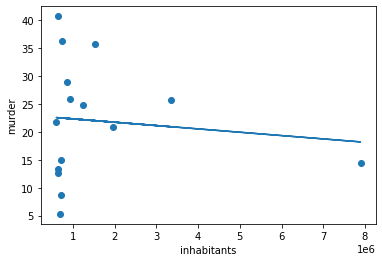

Parameters [intercept, slope] =  [-32.02501229778295, 2.675941824526892] ,
Training error = 34.5405
Test error = 6.4156


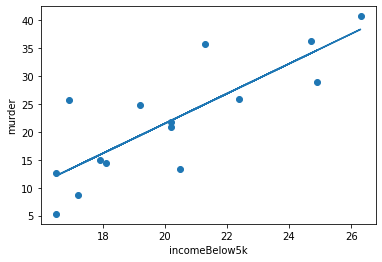

Parameters [intercept, slope] =  [-26.74262048192785, 6.870670180722909] ,
Training error = 25.1054
Test error = 18.8960


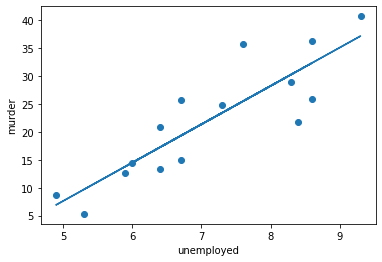

In [84]:
print("RESULTS FOR MySimpleLinearRegression()")
print("--------------------------------------\n")

names, datas, murder, test_sets, test_murder = loadData(FILE_NAME)
for i,d in enumerate(datas):
    plotData(d.tolist(), murder.tolist(), test_sets[i].tolist(), test_murder.tolist(), names[i])

RESULTS FOR LinearRegression() from sklearn
--------------------------------------

Parameters [intercept, slope] =  [ 22.91500646227083 -5.973512328924331e-07 ],
Training error = 101.9100
Test error = 72.9864


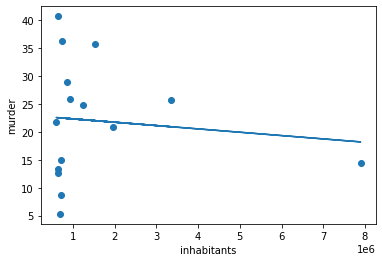

Parameters [intercept, slope] =  [ -32.02501229778268 2.6759418245268836 ],
Training error = 34.5405
Test error = 6.4156


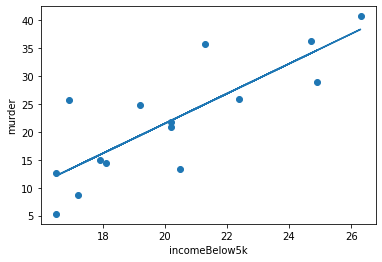

Parameters [intercept, slope] =  [ -26.742620481927723 6.870670180722893 ],
Training error = 25.1054
Test error = 18.8960


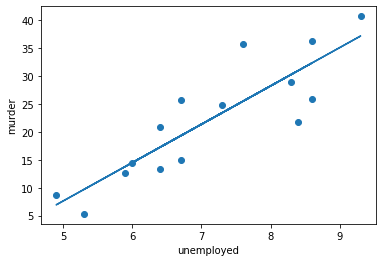

In [85]:
print("RESULTS FOR LinearRegression() from sklearn")
print("--------------------------------------\n")

#names, datas, murder, test_sets, test_murder = loadData(FILE_NAME)
for i,d in enumerate(datas):
    plotData_sklearn(d.tolist(), murder.tolist(), test_sets[i].tolist(), test_murder.tolist(), names[i])

In [86]:
#ready test written by WK, edited by Mateusz Kmieć
def runTest_MySimpleLinearRegression():
    model = MySimpleLinearRegression()
    x = [0, 1, 2, 3]
    y = [-4., -2, 0, 2]
    model.fit(x, y)
    params = model.getParams()
    np.testing.assert_almost_equal(params[0], -4.)
    np.testing.assert_almost_equal(params[1], 2.)
    np.testing.assert_almost_equal(model.predict(7), 10.)
    
    print("Tested positive! Fitted parameters values: ")
    return params

In [87]:
result=np.array(runTest_MySimpleLinearRegression())
print(result)

Tested positive! Fitted parameters values: 
[-4.  2.]
